This notebook shows a visualization of the pre-construction, construction and operating coal plants in India.

In [18]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from shapely.geometry import Point
import contextily as ctx
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [20]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "cmr10"
})
plt.rcParams['font.size'] = 12
mpl.rcParams['axes.unicode_minus'] = True

In [3]:
india_plant = pd.read_excel('exposures/exposures_coal.xlsx')
map_india = gpd.read_file('shape_file/DISTRICT_BOUNDARY.shp')
map_india = map_india.to_crs(epsg=4326)

C:\Users\Admin\AppData\Local\Temp\ipykernel_48056\1099473619.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


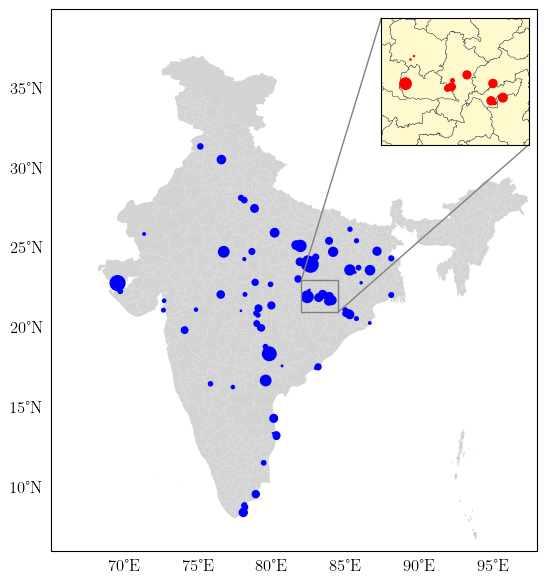

In [26]:
geometry = [Point(xy) for xy in zip(india_plant['longitude'], india_plant['latitude'])]
gdf = gpd.GeoDataFrame(india_plant, geometry=geometry, crs="EPSG:4326")

proj = ccrs.PlateCarree()
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': proj})

map_india.plot(ax=ax, facecolor='lightgray', transform=proj)

gdf.plot(ax=ax, color='blue', markersize=india_plant['value']/50000000, transform=proj)

ax.set_extent([65, 98, 6, 40], crs=proj)

gl = ax.gridlines(draw_labels=True, linewidth=0, color='none')
gl.top_labels = False
gl.right_labels = False

axins = zoomed_inset_axes(ax, 4, loc=1)
plt.xticks(visible=False)
plt.yticks(visible=False)
axins.get_xaxis().set_ticks([])
axins.get_yaxis().set_ticks([])
map_india.plot(ax=axins, color="#FFFACD", edgecolor="#2a3b42", linewidth=0.3)
plt.scatter(india_plant['longitude'], india_plant['latitude'], 
            c='red', s=india_plant['value']/50000000, )
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")
axins.set_xlim(82, 84.5)
axins.set_ylim(21, 23)

plt.tight_layout()
plt.show()